# Notebook de Preprocessamento de Dados

## Imports

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.loader import DataLoader
from src.data.preprocessor import DataPreprocessor, preprocess_dataset

loader = DataLoader(data_root="../data/raw")
sns.set_style('whitegrid')

## Testes

### Fashion Mnist

In [2]:
X_train, y_train, X_test, y_test = loader.load_dataset(
    'fashion-mnist',
)

print("\nShape original:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Range: [{X_train.min()}, {X_train.max()}]")

Carregando Fashion-MNIST com 60000 amostras de treino e 10000 amostras de teste.
Fashion-MNIST carregado com sucesso. X_train: (60000, 784), X_test: (10000, 784)

Shape original:
X_train: (60000, 784), X_test: (10000, 784)
Range: [0, 255]


In [3]:
preprocessor = DataPreprocessor(normalization='standard', random_state=42)

X_train_norm = preprocessor.fit_transform(X_train, y_train)[0]
X_test_norm = preprocessor.transform(X_test)

print("\nShape após normalização:")
print(f"X_train: {X_train_norm.shape}, X_test: {X_test_norm.shape}")
print(f"Range: [{X_train_norm.min():.4f}, {X_test_norm.max():.4f}]")

Dados normalizados com standard
Shape: (60000, 784), Min: -2.4126, Max: 191.2585

Shape após normalização:
X_train: (60000, 784), X_test: (10000, 784)
Range: [-2.4126, 178.3213]


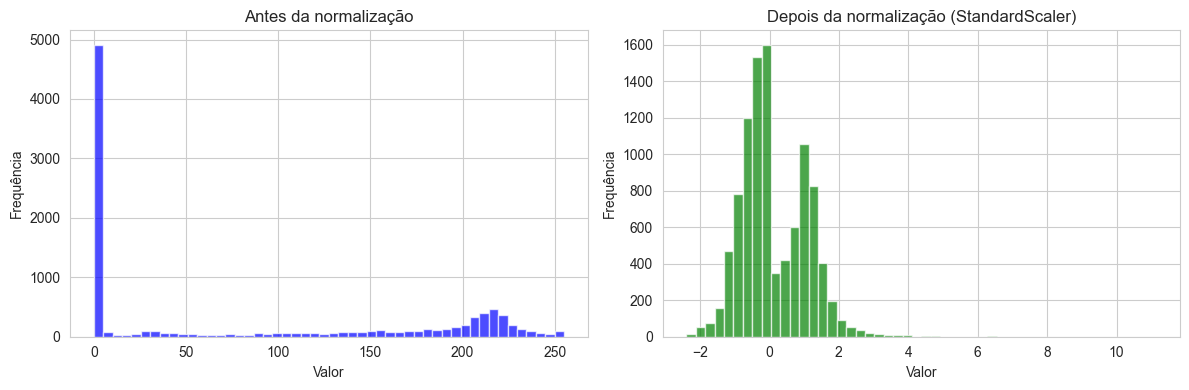

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(X_train.flatten()[:10000], bins=50, alpha=0.7, color='blue')
axes[0].set_title('Antes da normalização')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frequência')

axes[1].hist(X_train_norm.flatten()[:10000], bins=50, alpha=0.7, color='green')
axes[1].set_title('Depois da normalização (StandardScaler)')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

### Colon

In [5]:
X_train_c, y_train_c, X_test_c, y_test_c = preprocess_dataset(
    *loader.load_dataset('colon')[0:2],
    normalization='standard',
    test_size=0.3,
    random_state=42
)

Carregando conjunto de dados de microarray: COLON-TUMOR
Formato Elvira detectado
Parseando arquivo Elvira: colonTumor.dbc
Número de casos esperados: 62
Encontrados 2001 nós/variáveis
Nó de label: SampleType
Estados do label: ['positive', 'negative']
Extraídos 62 casos
Mapeamento de labels: {'positive': 0, 'negative': 1}
Matriz de dados: X=(62, 2000), y=(62,)
Classes únicas em y: [0 1] (distribuição: [22 40])
Conjunto de dados COLON-TUMOR carregado com sucesso. X_train: (43, 2000), X_test: (19, 2000)
Features: 2000, Samples: 62, Classes: 2
Dados normalizados com standard
Shape: (43, 2000), Min: -1.9836, Max: 6.2386
Divisão treino/teste: 70/30
Treino: (30, 2000), Teste: (13, 2000)
Distribuição treino: [10 20]
Distribuição teste: [5 8]


In [6]:
preprocessor_c = DataPreprocessor()
stats = preprocessor_c.get_feature_statistics(X_train_c)

print("Estatísticas Colon (normalizado):")
print(f"Amostras: {stats['n_samples']}, Features: {stats['n_features']}")
print(f"Média global: {stats['mean'].mean():.4f}")
print(f"Desvio padrão global: {stats['std'].mean():.4f}")

Estatísticas Colon (normalizado):
Amostras: 30, Features: 2000
Média global: -0.0614
Desvio padrão global: 0.9079


In [7]:
datasets = ['fashion-mnist', 'colon', 'leukemia', 'cns', 'mll', 'ovarian']

for dataset_name in datasets:
    try:
        print(f"\nPreprocessando: {dataset_name}\n")
        
        X, y = loader.load_dataset(dataset_name)[0:2]
        
        X_train, X_test, y_train, y_test = preprocess_dataset(
            X, y,
            normalization='standard',
            test_size=0.3,
            random_state=42
        )
        
        print(f"✓ {dataset_name} preprocessado com sucesso")
        
    except Exception as e:
        print(f"✗ Erro em {dataset_name}: {e}")


Preprocessando: fashion-mnist

Carregando Fashion-MNIST com 60000 amostras de treino e 10000 amostras de teste.
Fashion-MNIST carregado com sucesso. X_train: (60000, 784), X_test: (10000, 784)
Dados normalizados com standard
Shape: (60000, 784), Min: -2.4126, Max: 191.2585
Divisão treino/teste: 70/30
Treino: (42000, 784), Teste: (18000, 784)
Distribuição treino: [4200 4200 4200 4200 4200 4200 4200 4200 4200 4200]
Distribuição teste: [1800 1800 1800 1800 1800 1800 1800 1800 1800 1800]
✓ fashion-mnist preprocessado com sucesso

Preprocessando: colon

Carregando conjunto de dados de microarray: COLON-TUMOR
Formato Elvira detectado
Parseando arquivo Elvira: colonTumor.dbc
Número de casos esperados: 62
Encontrados 2001 nós/variáveis
Nó de label: SampleType
Estados do label: ['positive', 'negative']
Extraídos 62 casos
Mapeamento de labels: {'positive': 0, 'negative': 1}
Matriz de dados: X=(62, 2000), y=(62,)
Classes únicas em y: [0 1] (distribuição: [22 40])
Conjunto de dados COLON-TUMOR ca